# 1. Exploring the dataset

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import os
import re

In [2]:
# Import file and create dataframe

csv_file = 'attacks.csv'
sharks = pd.read_csv(csv_file, encoding='ISO-8859-1')
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check the number of rows and columns in the dataframe

sharks.shape

(25723, 24)

In [4]:
# Check the datatypes of the dataframe

sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [5]:
# Check the names of the columns

sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# 2. Data pre-processing

In [6]:
# Rename the columns with a comprehension list

sharks.columns = [i.lower().replace(" ", "_") for i in sharks.columns]
sharks

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Rename the columns of sex_, species_ and fatal_(y/n)

sharks.rename(columns={"sex_":"sex"}, inplace=True)
sharks.rename(columns={"species_":"species"}, inplace=True)
sharks.rename(columns={"fatal_(y/n)":"fatal"}, inplace=True)
sharks

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check for null values

sharks.isna().sum()

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal                     19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

In [9]:
# Dropping the rows where all the columns have null values

sharks = sharks.dropna(how='all')

In [10]:
# Checking if there are less missing values now

sharks.isna().sum()

case_number                  1
date                      2401
year                      2403
type                      2405
country                   2451
area                      2856
location                  2941
activity                  2945
name                      2611
sex                       2966
age                       5232
injury                    2429
fatal                     2940
time                      5755
species                   5239
investigator_or_source    2418
pdf                       2401
href_formula              2402
href                      2401
case_number.1             2401
case_number.2             2401
original_order            2394
unnamed:_22               8702
unnamed:_23               8701
dtype: int64

In [11]:
# Checking for duplicated data

print(f"Dataset has {sharks.duplicated().sum()} duplicated data.")

Dataset has 2392 duplicated data.


In [12]:
# Dropping the duplicates

sharks = sharks.drop_duplicates() 

# Checking if the previous step has worked:

print(f"Dataset has {sharks.duplicated().sum()} duplicated data.")

Dataset has 0 duplicated data.


In [13]:
# Exploring the sex column

sharks.value_counts('sex')

sex
M      5094
F       637
M         2
N         2
.         1
lli       1
Name: count, dtype: int64

# 3. Transforming the data

In [14]:
# Checking how are the values of the 'sex' column, so that I can modify them afterwards.

set(sharks.sex)

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [15]:
# Creating a function so that the values of sex only return 'M', 'F' or 'unknown'

def clean_sex(x):
    if x != 'M' and x != 'F' and x != 'M ':
        return "unknown"
    if x == 'M ':
        return 'M'
    else:
        return x

In [16]:
sharks['sex']=sharks['sex'].apply(clean_sex)

In [17]:
# checking if the function has worked:

set(sharks.sex)

{'F', 'M', 'unknown'}

In [18]:
pd.DataFrame(sharks.value_counts('sex')).sample(3)

,count
sex,
F,637
unknown,578
M,5096


In [19]:
set(sharks.type)

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

## 3.1. Segmentation for Provoked Sharks Attacks since 2000 until nowadays

In [20]:
# I want to analyze the people who provoked shark accidents, that's why I'm filtering the dataset where the type of attack is: provoked.

provoked_df = sharks[(sharks['type'] == 'Provoked')]
provoked_df

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,...,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN
14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,...,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,NaN,NaN
41,2018.02.17,18-Feb-2018,2018.0,Provoked,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,Brett Palmer,M,...,NaN,"B. Myatt, GSAF",2018.02.17-Palmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.17,2018.02.17,6262.0,NaN,NaN
55,2017.12.21,21-Dec-2017,2017.0,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,M,...,Juvenile nurse shark,TrackingSharks.com,2017.12.21-Harun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.21,2017.12.21,6248.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,ND.0089,"No date, Before Aug-1987",0.0,Provoked,VANUATU,Malampa Province,"Hokai, Malakula",Attempting to drive shark from area,a chief,M,...,A large hammerhead shark,S. Combs,ND-0089-VanuatuChief.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0089,ND.0089,79.0,NaN,NaN
6226,ND.0087,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,...,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",ND-0087-Carl-Bruster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0087,ND.0087,77.0,NaN,NaN
6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,John Fenton,M,...,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",ND-0055-JohnFenton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0055,ND.0055,53.0,NaN,NaN
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,Havana Province,Cojimar,"Shark fishing, knocked overboard",Sandrillio,M,...,NaN,"F. Poli, pp.75, 81-83",ND-0051-Sandrillio.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0051,ND.0051,49.0,NaN,NaN


In [21]:
set(provoked_df.year)

{0.0,
 1792.0,
 1801.0,
 1842.0,
 1852.0,
 1863.0,
 1864.0,
 1871.0,
 1873.0,
 1877.0,
 1878.0,
 1879.0,
 1882.0,
 1883.0,
 1884.0,
 1886.0,
 1887.0,
 1889.0,
 1890.0,
 1891.0,
 1892.0,
 1894.0,
 1895.0,
 1897.0,
 1899.0,
 1900.0,
 1902.0,
 1905.0,
 1906.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1916.0,
 1917.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1944.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1998.0,
 199

In [22]:
def modern_years(x):
    x = int(x)
    if x >= 2000:
        return x
    else:
        return "old years"

In [23]:
provoked_df['year'] = provoked_df['year'].apply(modern_years)

/var/folders/_b/4s7pp99j1qq9lxsqpjphc78m0000gn/T/ipykernel_97641/1945932812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provoked_df['year'] = provoked_df['year'].apply(modern_years)


In [24]:
# I'm going to create a subset considering only provoked shark attacks since the year 2000

provoked_df = provoked_df[provoked_df['year'] != 'old years']
provoked_df

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
10,2018.05.24,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,...,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN
14,2018.05.00,May 2018,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,...,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,NaN,NaN
41,2018.02.17,18-Feb-2018,2018,Provoked,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,Brett Palmer,M,...,NaN,"B. Myatt, GSAF",2018.02.17-Palmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.17,2018.02.17,6262.0,NaN,NaN
55,2017.12.21,21-Dec-2017,2017,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,M,...,Juvenile nurse shark,TrackingSharks.com,2017.12.21-Harun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.21,2017.12.21,6248.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,2001.05.18,18-May-2001,2001,Provoked,PHILIPPINES,Zamboanga del Sur Province,NaN,Shark fishing,Amir Badi,M,...,NaN,AFP,2001.05.18-Badi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.05.18,2001.05.18,4357.0,NaN,NaN
1965,2001.04.08.a,08-Apr-2001,2001,Provoked,AUSTRALIA,New South Wales,Bronte Beach,Snorkeling,Andranik Markossian,M,...,Wobbegong shark,"ABC News; Northern Territory News, 4/9/2001, p.2",2001.04.08.a-Markossian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.04.08.a,2001.04.08.a,4338.0,NaN,NaN
2006,2000.09.18,19-Sep-2000,2000,Provoked,AUSTRALIA,New South Wales,Wollongong,Fell onto dead shark,boy,M,...,100-kg [221-lb] dead blue shark,Illwara Mercury. 9/19/2000,2000.09.18-boy_provoked.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.09.18,2000.09.18,4297.0,NaN,NaN
2020,2000.08.27.R,Reported 27-Aug-2000,2000,Provoked,USA,Alaska,Prince William Sound,Conducting research,Bruce Wright,M,...,Salmon shark,B.A. Wright,2000.08.27.R-BruceWright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.08.27.R,2000.08.27.R,4283.0,NaN,NaN


In [25]:
# Checking if the function has worked

set(provoked_df.year)

{2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

In [26]:
# Now I'm going to create a subset with only the columns that are relevant for my research.

provoked_df = provoked_df[['sex', 'age', 'country', 'area', 'location', 'activity', 'fatal', 'time', 'year']]
provoked_df

,sex,age,country,area,location,activity,fatal,time,year
4,M,NaN,MEXICO,Colima,La Ticla,Free diving,N,NaN,2018
10,M,32,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,N,Morning,2018
14,F,34,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,N,NaN,2018
41,M,34,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,N,Night,2018
55,M,24,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,N,NaN,2017
...,...,...,...,...,...,...,...,...,...
1946,M,24,PHILIPPINES,Zamboanga del Sur Province,NaN,Shark fishing,N,NaN,2001
1965,M,NaN,AUSTRALIA,New South Wales,Bronte Beach,Snorkeling,N,NaN,2001
2006,M,12,AUSTRALIA,New South Wales,Wollongong,Fell onto dead shark,N,NaN,2000
2020,M,NaN,USA,Alaska,Prince William Sound,Conducting research,N,NaN,2000


### 3.1.1. How many males and females are among the people who provoked shark attacks?

In [27]:
pd.DataFrame(provoked_df.value_counts('sex')).sample(3)

,count
sex,
F,11
M,144
unknown,5


sex
M          144
F           11
unknown      5
Name: count, dtype: int64


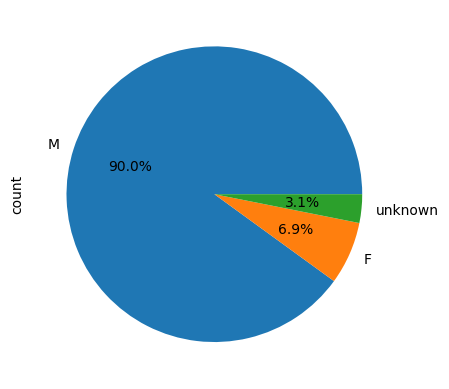

In [28]:
sex_prov = provoked_df["sex"].value_counts()
print(sex_prov)

sex_prov.plot.pie(autopct="%.1f%%");

### 3.1.2. What is the mean age of the people who provoked the attacks?

In [29]:
# Checking how are the values of the column 'age' so that I can modify them afterwards. 

set(provoked_df.age)

{' ',
 '10',
 '12',
 '14',
 '15',
 '16',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '39',
 '40',
 '40s',
 '41',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 '52',
 '53',
 '55',
 '57',
 '58',
 '59',
 '63',
 '73',
 '77',
 '9',
 nan,
 '\xa0 '}

In [30]:
# Creating a function to clean the values of the column 'age'. 

def clean_age(x):
    if pd.isna(x):
        return "unknown"
    if x in ["teen", "Teens", "Teens"]:
        return "15"
    if x == "middle-aged":
        return "50"
    if x in ["adult", "(adult)"]:
        return 35  
    if x == "18 months":
        return "2"
    
    age_av = re.findall(r'(\d{1,2})\s*(&|or|to)\s*(\d{1,2})', str(x))
    if age_av:
        average_ages = [round((int(match[0]) + int(match[2])) / 2) for match in age_av]
        return str(average_ages[0])
    
    age_match = re.search(r'\d{1,2}', str(x))
    if age_match:
        return age_match.group()
    
    return "unknown"

In [31]:
provoked_df.loc[:, 'age'] = provoked_df['age'].apply(clean_age)

In [32]:
set(provoked_df.age)

{'10',
 '12',
 '14',
 '15',
 '16',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '39',
 '40',
 '41',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 '52',
 '53',
 '55',
 '57',
 '58',
 '59',
 '63',
 '73',
 '77',
 '9',
 'unknown'}

In [33]:
age_prov = provoked_df["age"].value_counts()
age_prov

age
unknown    54
34          8
20          8
24          5
15          4
30          4
32          4
21          4
43          4
40          3
19          3
23          3
39          3
25          3
36          3
52          3
48          3
29          3
50          2
46          2
55          2
49          2
58          2
31          2
59          2
10          2
33          2
57          2
9           2
45          1
35          1
16          1
63          1
41          1
38          1
44          1
77          1
27          1
14          1
53          1
3           1
26          1
22          1
73          1
12          1
Name: count, dtype: int64

In [34]:
# I create a counter to check hoy many unknown age values I have compared to the known. 

age_counter = provoked_df['age'].apply(lambda x: x != 'unknown').value_counts()
age_counter

age
True     106
False     54
Name: count, dtype: int64

In [35]:
'''I need to compare the sex with the age of the people who provoked shark attacks. 
So I'm going to create a new data frame where I drop the rows if there is a useless value in the column of 'age'.
'''

"I need to compare the sex with the age of the people who provoked shark attacks. \nSo I'm going to create a new data frame where I drop the rows if there is a useless value in the column of 'age'.\n"

In [36]:
provoked_df2 = provoked_df[provoked_df['age'].notna()]

In [37]:
provoked_df3 = provoked_df2[provoked_df2['age'] != 'unknown']

In [38]:
set(provoked_df3.age)

{'10',
 '12',
 '14',
 '15',
 '16',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '39',
 '40',
 '41',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 '52',
 '53',
 '55',
 '57',
 '58',
 '59',
 '63',
 '73',
 '77',
 '9'}

/var/folders/_b/4s7pp99j1qq9lxsqpjphc78m0000gn/T/ipykernel_97641/347838120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provoked_df3['age'] = provoked_df3['age'].astype(float)


<Axes: xlabel='age', ylabel='Count'>

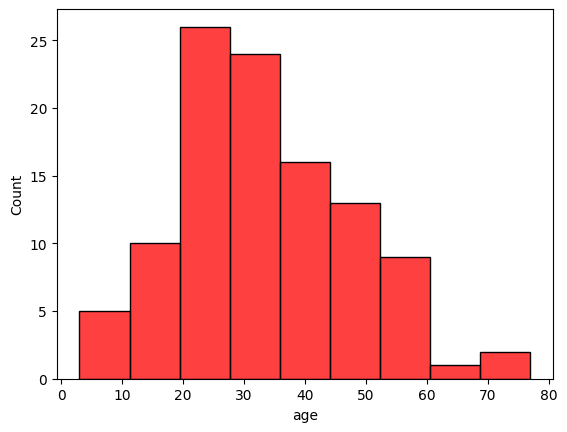

In [39]:
provoked_df3['age'] = provoked_df3['age'].astype(float)

sns.histplot(data=provoked_df3, x='age', color='red')

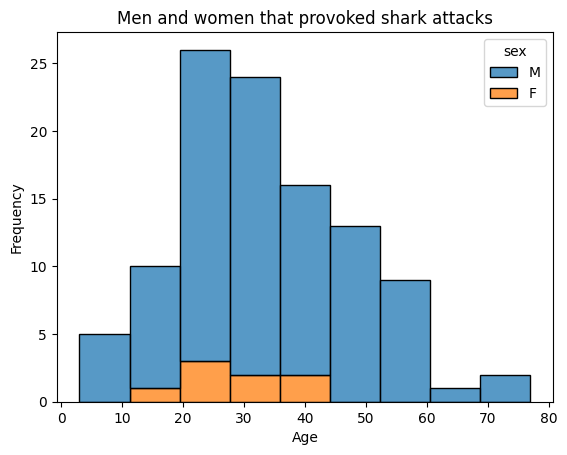

In [40]:
# Now I can see the average age of men and women (and unknown sex) that provoked shark attacks. 

sns.histplot(data=provoked_df3, x='age', hue="sex", multiple="stack")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Men and women that provoked shark attacks')
plt.show()


### 3.1.3. Where are most of the people who provoked shark attacks from?

In [41]:
# Checking how are the values of the 'country' column

set(provoked_df3.country)

{'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BRAZIL',
 'CHINA',
 'DOMINICAN REPUBLIC',
 'ENGLAND',
 'FRANCE',
 'FRENCH POLYNESIA',
 'GUAM',
 'ITALY',
 'MALAYSIA',
 'MAURITIUS',
 'MEXICO',
 'NEW ZEALAND',
 'NORWAY',
 'PALESTINIAN TERRITORIES',
 'PHILIPPINES',
 'SCOTLAND',
 'SOUTH AFRICA',
 'SPAIN',
 'TAIWAN',
 'THAILAND',
 'UNITED KINGDOM',
 'USA'}

In [42]:
# Creating a function that standardizes Scotland and England with the United Kingdom. (I feel sorry for the Scottish people though)

def clean_uk(x):
    if x == 'SCOTLAND' or x == 'ENGLAND':
        return 'UNITED KINGDOM'
    else:
        return x

In [43]:
# Checking if the function works

provoked_df3.loc[:, 'country'] = provoked_df3['country'].apply(clean_uk)

In [44]:
country_prov = provoked_df3['country'].value_counts()
country_prov

country
USA                        38
AUSTRALIA                  26
SOUTH AFRICA                7
UNITED KINGDOM              6
BAHAMAS                     5
NEW ZEALAND                 3
MEXICO                      3
FRENCH POLYNESIA            2
TAIWAN                      2
PALESTINIAN TERRITORIES     1
FRANCE                      1
MALAYSIA                    1
ITALY                       1
MAURITIUS                   1
DOMINICAN REPUBLIC          1
SPAIN                       1
BRAZIL                      1
GUAM                        1
AZORES                      1
NORWAY                      1
THAILAND                    1
CHINA                       1
PHILIPPINES                 1
Name: count, dtype: int64

In [45]:
counts = provoked_df3['country'].groupby(provoked_df3['country']).transform('count')

# To filter the countries, I create a boolean mask to check in which countries there have been more than 1 provoked attack:

mask = counts > 1
provoked_df3['country'] = provoked_df3['country'][mask]

/var/folders/_b/4s7pp99j1qq9lxsqpjphc78m0000gn/T/ipykernel_97641/564159005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provoked_df3['country'] = provoked_df3['country'][mask]


In [46]:
country_prov = provoked_df3['country'].value_counts()
country_prov

country
USA                 38
AUSTRALIA           26
SOUTH AFRICA         7
UNITED KINGDOM       6
BAHAMAS              5
MEXICO               3
NEW ZEALAND          3
FRENCH POLYNESIA     2
TAIWAN               2
Name: count, dtype: int64

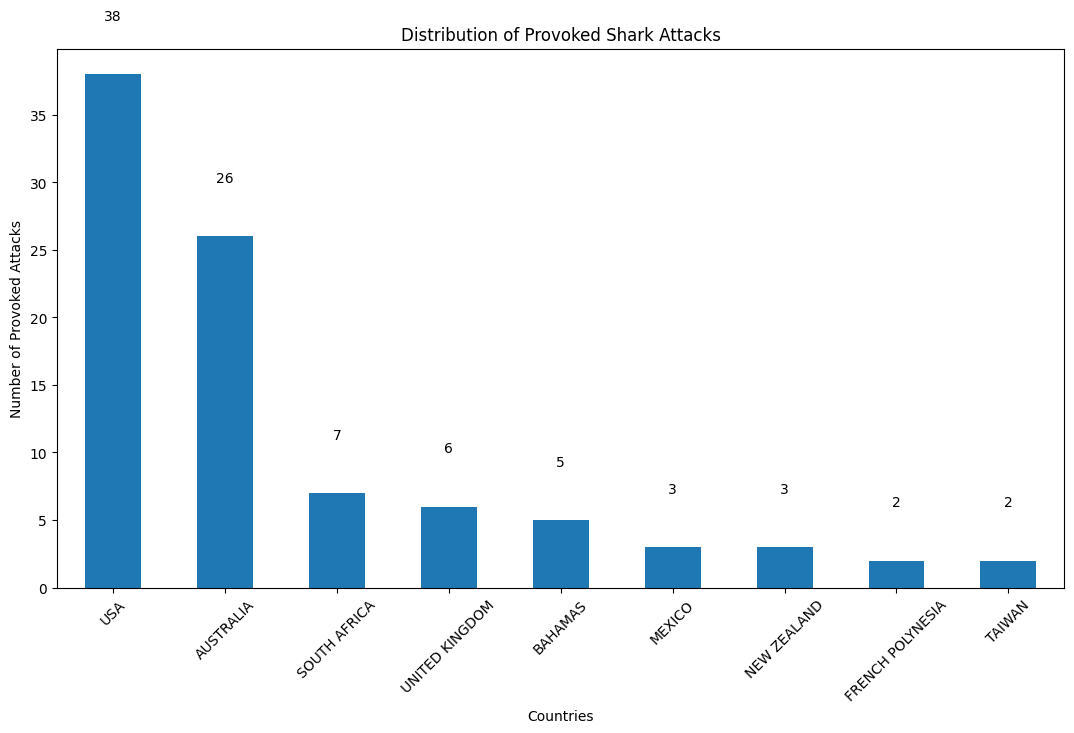

In [47]:
country_prov.plot(kind='bar', figsize=(13,7))
plt.title('Distribution of Provoked Shark Attacks')
plt.xlabel('Countries')
plt.ylabel('Number of Provoked Attacks')
plt.xticks(rotation=45) 
for index, value in enumerate(country_prov):
    plt.text(index, value + 4, str(value), ha='center')
plt.show()

<Axes: xlabel='country'>

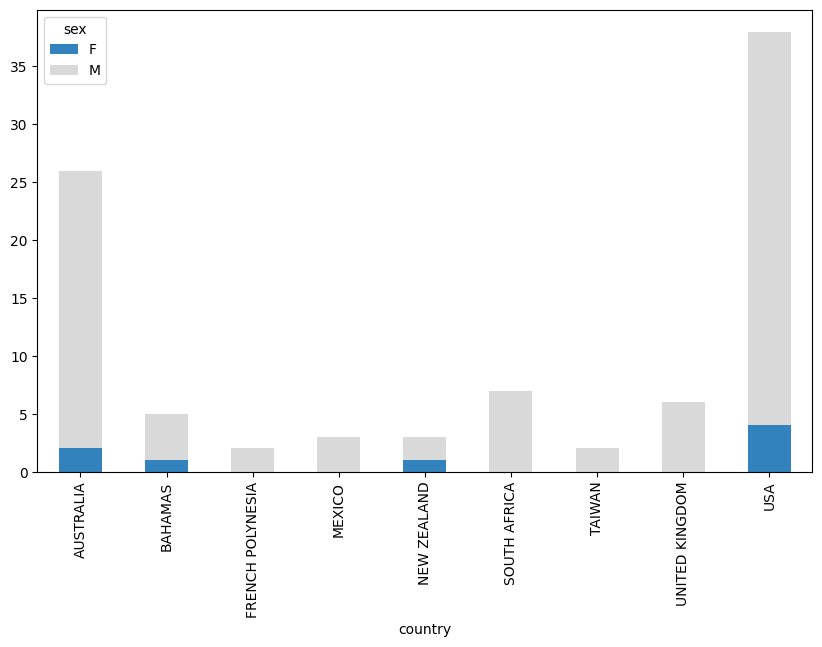

In [48]:
# Now I want to correlate the columns of sex and country

grouped = provoked_df3.groupby(['country', 'sex']).size().unstack()
grouped.plot(kind='bar', figsize=(10,6), stacked=True, colormap='tab20c')

In [49]:
# I'm going to check which are the areas in the first two countries (where there have been more provoked shark attacks)
 
provoked_areas = provoked_df3[provoked_df3['country'].isin(['USA', 'AUSTRALIA'])]
provoked_areas

,sex,age,country,area,location,activity,fatal,time,year
10,M,32.0,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,N,Morning,2018
14,F,34.0,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,N,NaN,2018
41,M,34.0,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,N,Night,2018
104,M,34.0,USA,Massachusetts,"Menauhant Beach, Falmouth,\nBarnstable County",Fishing,N,23h30,2017
139,F,20.0,USA,South Carolina,"Awendaw, Charleston County",Touching a shark,N,NaN,2017
...,...,...,...,...,...,...,...,...,...
1864,M,20.0,AUSTRALIA,Northern Territory,Darwin,Fishing from prawn trawler,N,NaN,2002
1898,M,21.0,USA,Florida,"Ponce Inlet, Volusia County","Surfing, fell off surfboard & stepped on the s...",N,16h20,2001
1904,M,44.0,USA,Florida,"Everglades National Park, Monroe County",Fishing,N,NaN,2001
1940,M,52.0,USA,California,Catalina Island,Spearfishing,N,09h00,2001


In [50]:
areas = provoked_areas["area"].value_counts()
areas

area
Florida               22
Queensland             7
New South Wales        7
Western Australia      4
California             4
Victoria               4
Northern Territory     3
Massachusetts          2
Hawaii                 2
Maryland               2
South Carolina         1
Westerm Australia      1
Palmyra Atoll          1
New York               1
New Jersey             1
Virginia               1
New Mexico             1
Name: count, dtype: int64

In [51]:
def clean_areas(x):
    if x == 'Westerm Australia':
        return 'Western Australia'
    else:
        return x

In [52]:
provoked_df3.loc[:, 'area'] = provoked_df3['area'].apply(clean_areas)
provoked_areas.loc[:, 'area'] = provoked_areas['area'].apply(clean_areas)
areas = provoked_areas["area"].value_counts()
areas

area
Florida               22
Queensland             7
New South Wales        7
Western Australia      5
Victoria               4
California             4
Northern Territory     3
Massachusetts          2
Hawaii                 2
Maryland               2
South Carolina         1
Palmyra Atoll          1
New York               1
New Jersey             1
Virginia               1
New Mexico             1
Name: count, dtype: int64

In [53]:
# Exploring the locations where there have been more provoked shark attacks, just for the fun :)

set(provoked_areas.location)

{"100 miles off Ocean City, Maryland, in 7000' of water",
 '20 k off The Spit, off the Gold Coast',
 '200 km east of Coolangatta  ',
 'Adventure Aquarium, Camden',
 'Albuquerue Aquarium, Albuquerue',
 'Assateague National Seashore',
 'Avoca Beach',
 'Awendaw, Charleston County',
 'Bermagui',
 'Between ',
 'Biscayne National Park, Miami',
 'Boca Raton, Palm Beach County',
 'Cairns Aquarium',
 'Catalina Island',
 'Coral Bay',
 'Cortes Bank',
 'Darwin',
 'Daytona Beach Shores, Volusia County',
 'Deer Creek Beach, Ventura County',
 'Dugong Bay',
 'Everglades National Park, Monroe County',
 'Fletcher Beach, Hutchinson Island, Martin County',
 'Florida Keys, Monroe County',
 'Hanalei Bay',
 'In a tidal creek    5 km from Wickham',
 'Key West Aquarium',
 'La Jolla, San Diego County',
 'Lahaina',
 'Lanai',
 'Menauhant Beach, Falmouth,\nBarnstable County',
 'Merimbula',
 'Moffat Beach, Caloundra',
 'Near Croker Island',
 'Near New Smyrna Jetty, Volusia County',
 'New Smyrna Beach,  Volusia Coun

<Axes: xlabel='area'>

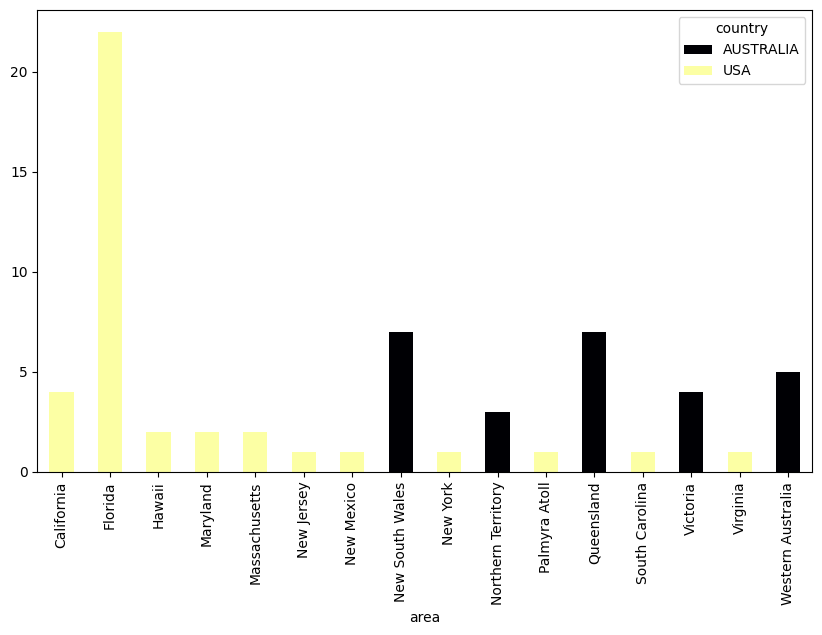

In [54]:
# And now I'm checking which are the areas where there have been more provoked shark attacks. 

grouped2 = provoked_areas.groupby(['area', 'country']).size().unstack()
grouped2.plot(kind='bar', figsize=(10,6), stacked=True, colormap='inferno')

### 3.1.4. Which activities were doing most of the people who provoked shark attacks?

In [55]:
# Checking how are the values of the column 'age' so that I can modify them afterwards. 
# Here I work with the previous dataframe (provoked_df instead of provoked_df3), otherwise I'd loose interesting information. 
# I'll see later what can I do in case I want to relate the activities with ages. 

set(provoked_df.activity)

{"Accidentally stood on hooked shark's tail before attempting to gut it ",
 'Attempting to drive shark away from sailing regatta',
 'Attempting to lasso a shark',
 'Attempting to rescue an injured & beached shark',
 'Boogie Boarding',
 'Canoeing',
 'Conducting research',
 'Diving',
 'Diving / Kissing the shark',
 'Diving in aquarium display tank',
 'Diving, feeding sharks',
 'Feeding prawns to captive sharks',
 'Feeding sharks',
 'Fell onto dead shark',
 'Fishing',
 'Fishing ',
 'Fishing (illegally)',
 "Fishing - 'tag & release'",
 'Fishing / Wading',
 'Fishing for blue sharks',
 'Fishing for sharks',
 'Fishing for snapper',
 'Fishing from prawn trawler',
 'Fishing, removing the shark from his line',
 'Free diving',
 'Free diving & spearfishing',
 'Grabbing shark for a selfie',
 'Kayak Fishing',
 'Kayak fishing for sharks',
 'Killing  sharks',
 'Kite Surfing',
 'Lobstering',
 'Longline fishing for sharks',
 'Measuring sharks',
 'Petting a shark',
 'Petting captive sharks',
 'Removing h

In [56]:
provoked_df = provoked_df[provoked_df['activity'].notna()]

In [57]:
# Creating a function to clean the values of the 'activity' column

def func_(dict_, string):
    for key, words in dict_.items():
        if any(word in str(string) for word in words):
            return key

In [58]:
def clean_activities(activity):
    activities = {
        'boat': ['boat', 'boating', 'racing', 'barqued', 'sinking', 'ship', 'wreck', 'dhow', 'kayak', 'canoa', 'raft', 'cutter', 'bark', 'submarine'],
        'fishing': ['fishing', 'fish', 'spearfishing', 'netting', 'wade-fishing', 'hunting', 'fishingat', 'shrimping', 'gigging', 'picking', 'hook', 'net'],
        'air_accidents': ['aircraft', 'airliner', 'constellation'],
        'swimming': ['swimming', 'riding'],
        'diving': ['diving', 'diver', 'photographing', 'dive', 'skindiving'],
        'surf': ['surfing', 'surf', 'boogie', 'surf-skiing', 'paddeling', 'boarding', 'board', 'overboard', 'treading'],
        'bathing': ['playing', 'bath', 'bathing', 'crouching', 'floating', 'standing', 'sitting', 'dangling']
    }

    for key, word_list in activities.items():
        if any(keyword in str(activity).lower() for keyword in word_list):
            return key
    return "shark interaction"

In [59]:
provoked_df.loc[:, 'activity'] = provoked_df['activity'].apply(clean_activities)

In [60]:
# Checking if the function has filtered the activities

set(provoked_df.activity)

{'bathing',
 'boat',
 'diving',
 'fishing',
 'shark interaction',
 'surf',
 'swimming'}

In [61]:
# I create a counter to check hoy many unknown activities I have compared to the specific ones (disaster again)

act_counter = provoked_df['activity'].apply(lambda x: x != "shark interaction").value_counts()
age_counter

age
True     106
False     54
Name: count, dtype: int64

activity
fishing              91
shark interaction    29
diving               14
surf                 11
swimming              8
boat                  3
bathing               1
Name: count, dtype: int64


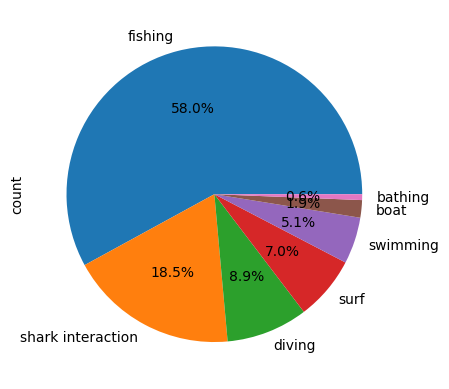

In [62]:
# Check which are the activities that lead to more provoked shark attacks. 

act_prov = provoked_df["activity"].value_counts()
print(act_prov)

act_prov.plot.pie(autopct="%.1f%%");

<Axes: xlabel='activity'>

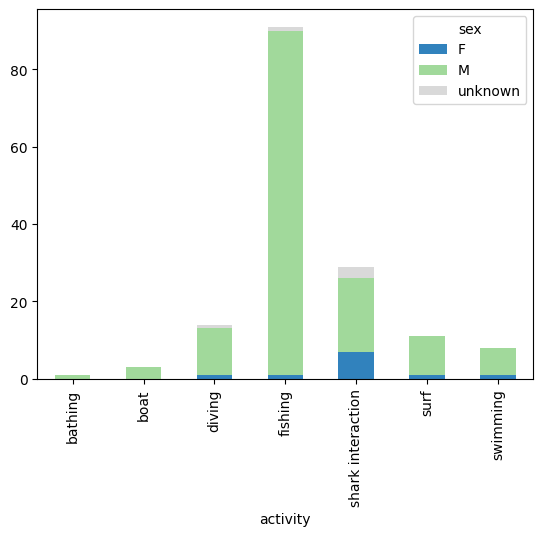

In [63]:
# Now I want to correlate the columns of activity and sex

grouped_act = provoked_df.groupby(['activity', 'sex']).size().unstack()
grouped_act.plot(kind='bar', stacked=True, colormap='tab20c')

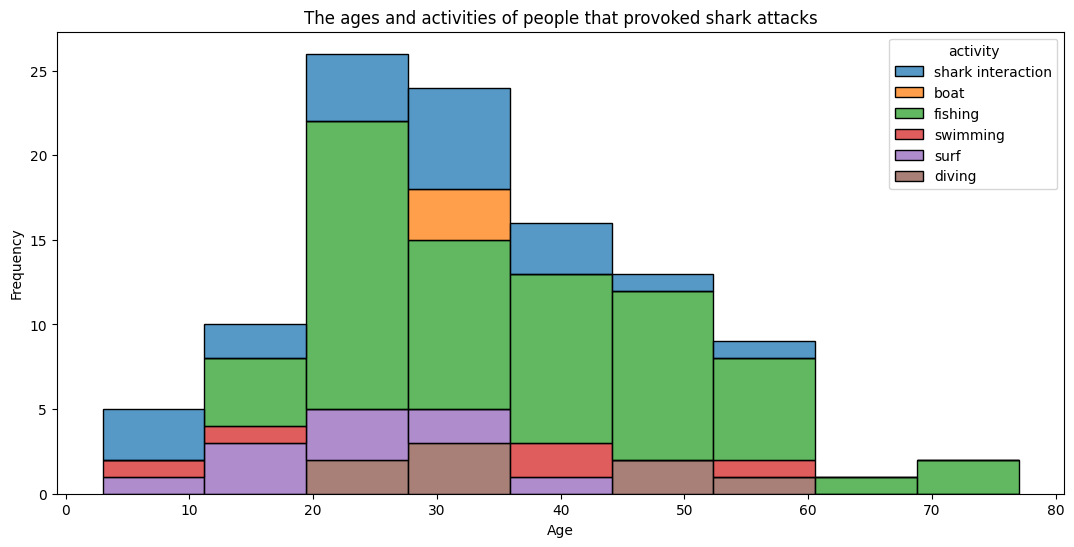

In [82]:
# Now I want to correlate the columns of activity and age

provoked_df3.loc[:, 'activity'] = provoked_df3['activity'].apply(clean_activities)

plt.figure(figsize=(13, 6))

sns.histplot(data=provoked_df3, x='age', hue="activity", multiple="stack")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('The ages and activities of people that provoked shark attacks')
plt.show()

### 3.1.5. How many provoked shark attacks resulted lethal?

In [64]:
# Checking how are the values of the column 'fatal' so that I can modify them afterwards. 

set(provoked_df.fatal)

{'2017', 'M', 'N', 'Y', nan}

In [65]:
# creating a function so that the values of the column 'fatal' are "Y", "N" or "unknown"

def clean_fatal(x):
    if x != "N" and x != "Y" and x != "N " and x != " N" and x != "y" and x != "M":
        return "unknown"
    elif x == "N " or x == " N" or x =="M":
        return "N"
    elif x == "y":
        return "Y"
    else:
        return x

In [66]:
provoked_df.loc[:, 'fatal'] = provoked_df['fatal'].apply(clean_fatal)

In [67]:
set(provoked_df.fatal)

# It worked :) 

{'N', 'Y', 'unknown'}

fatal
N          152
Y            3
unknown      2
Name: count, dtype: int64


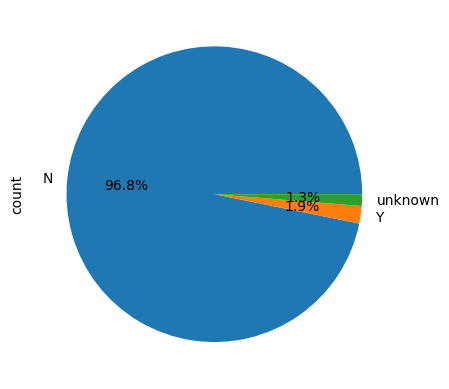

In [68]:
fatal_prov = provoked_df["fatal"].value_counts()
print(fatal_prov)

fatal_prov.plot.pie(autopct="%.1f%%");

# Only 3.3% of the provoked sharks attacks resulted lethal, and 1.05 % are unknown 

<Axes: xlabel='activity'>

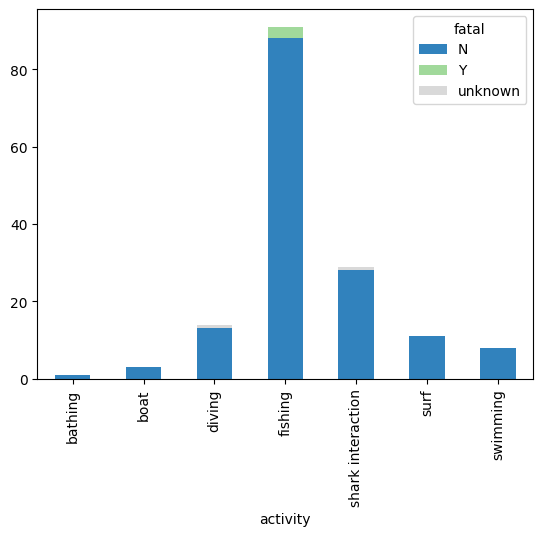

In [69]:
# I'm going to check which activity provoked more fatal attacks. 

grouped_fatal = provoked_df.groupby(['activity', 'fatal']).size().unstack()
grouped_fatal.plot(kind='bar', stacked=True, colormap='tab20c')

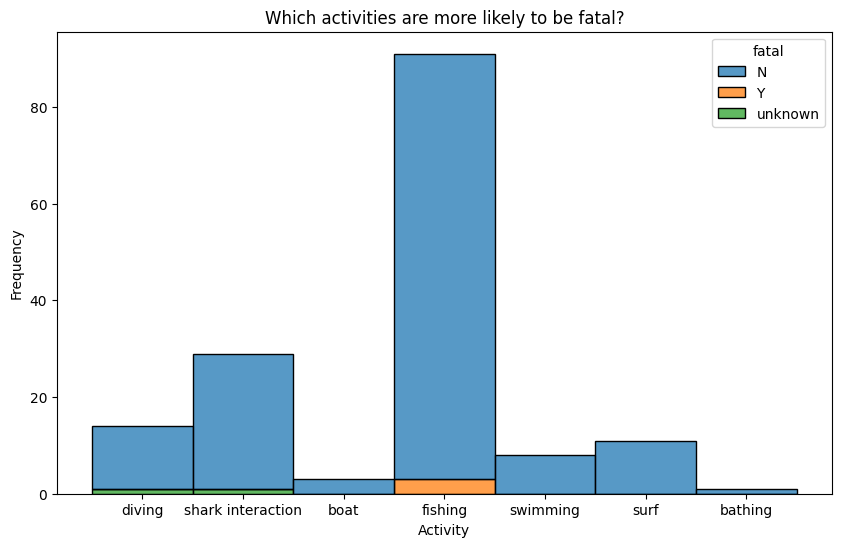

In [70]:
plt.figure(figsize=(10, 6))

sns.histplot(data=provoked_df, x='activity', hue="fatal", multiple="stack")
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Which activities are more likely to be fatal?')
plt.show()